In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST/',one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [13]:
# high level stats 
print("Number of examples-train data:",mnist.train.num_examples)
print("Number of examples-test data:",mnist.test.num_examples)


print("Shape of Train data:",mnist.train.images.shape)
print("Shape of Test data:",mnist.test.images.shape)

print("Shape of train labels:",mnist.train.labels.shape)
print("Shape of test labels:",mnist.test.labels.shape)

Number of examples-train data: 55000
Number of examples-test data: 10000
Shape of Train data: (55000, 784)
Shape of Test data: (10000, 784)
Shape of train labels: (55000, 10)
Shape of test labels: (10000, 10)


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
# placeholders 

x=tf.placeholder(tf.float32,[None,784])
y_actual=tf.placeholder(tf.float32,[None,10])

print("Shape of placeholder-x:",x.shape)
print("Shape of placeholder-y_actual:",y_actual.shape)

# variable declaration 

W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
print("Shape of the weight:",W.shape)
print("shape of the bias:",b.shape)

Shape of placeholder-x: (?, 784)
Shape of placeholder-y_actual: (?, 10)
Shape of the weight: (784, 10)
shape of the bias: (10,)


In [16]:
# predicting class labels using softmax 
y_pred=tf.nn.softmax(tf.matmul(x,W)+b)

print("Shape of y_pred",y_pred.shape)

Shape of y_pred (?, 10)


In [0]:
# Cross entropy calculation 
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_pred),1))
# Implementation of gradient descent with learning rate of 0.05
train_step=tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


In [18]:
# Session creation:
sess=tf.InteractiveSession()
# initialising all global variables(w and b here)
tf.global_variables_initializer().run()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# we are passing 100 data points at a time 
# in that sense, here we are using minibatch SGD
for _ in range(1000):
  batch_xs,batch_ys=mnist.train.next_batch(100)
  result=sess.run(train_step,feed_dict={x:batch_xs,y_actual:batch_ys})
  

In [20]:
# checking performace of the model 

# performance metric here is accuracy 

correct_pred=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_actual,1))

accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

print("accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_actual:mnist.test.labels}))

accuracy: 0.9005


# Summarized code 

Here we are summarizing all the steps we have done above in one place 

In [21]:
#summarize everything in one place 

batch_size=1000
total_epoch=15
total_batches=int(mnist.train.num_examples/batch_size)
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_actual))

train_step=tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

xs=[] #epoches 
ytrs=[] # train_loss_avg
ytes=[] # test_loss_avg
for epoch in range(total_epoch):
  train_avg_loss=0
  test_avg_loss=0
  

  for cbatch in range(total_batches):
    batch_xs,batch_ys=mnist.train.next_batch(batch_size)
    _,c=sess.run([train_step,cross_entropy],feed_dict={x:batch_xs,y_actual:batch_ys})
    train_avg_loss+=c/total_batches
    c=sess.run(cross_entropy,feed_dict={x:mnist.test.images,y_actual:mnist.test.labels})
    test_avg_loss+=c/total_batches
    
  xs.append(epoch)
  ytrs.append(train_avg_loss)
  ytes.append(test_avg_loss)
  

correct_pred=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_actual,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
print("accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_actual:mnist.test.labels}))

accuracy: 0.9006


# Plot 

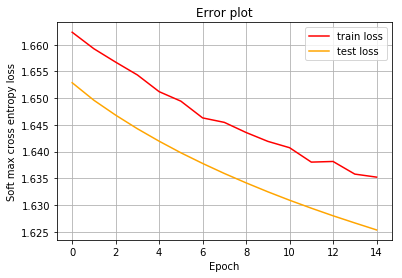

In [22]:

plt.plot(xs,ytrs,'r',label='train loss')
plt.plot(xs,ytes,'orange',label='test loss')
plt.legend(loc=0)
plt.title("Error plot")
plt.xlabel("Epoch")
plt.ylabel("Soft max cross entropy loss")
plt.grid(1)